In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
#path to the patient specific network, computed once with the GTEX reference network and once with the TCGA
tcga_breast_path = '/nfs/data2/dysregnet_gtex/results/tcga_breast_no_confounders_binary.fea'
tcga_lung_path = '/nfs/data2/dysregnet_gtex/results/tcga_lung_no_confounders_binary.fea'
gtex_breast_path = '/nfs/data2/dysregnet_gtex/results/gtex_breast_no_confounders.fea'
#gtex_lung_path = ''
tcga_breast_net = pd.read_feather(tcga_breast_path)
tcga_lung_net = pd.read_feather(tcga_lung_path)
gtex_breast_net = pd.read_feather(gtex_breast_path)
#gtex_lung_net =pd.read_feather(gtex_lung_path)

In [24]:
#set tissue
tissue = 'breast'
if tissue == 'breast':
    tcga_net = tcga_breast_net
    gtex_net = gtex_breast_net
elif tissue == 'lung':
    tcga_net = tcga_lung_net
    gtex_net = gtex_lung_net


In [25]:
tcga_net = tcga_net.set_index(tcga_net.columns[0])
tcga_net

,"('PAX8', 'PAX8-AS1')","('PAX8', 'RP11-65I12.1')","('TEF', 'NR1D1')","('SOX2', 'AKR1B10')","('SOX2', 'SFTPB')","('SOX2', 'CYP4F3')","('MYBL2', 'UBE2C')","('SPI1', 'TYROBP')","('FOXM1', 'TPX2')","('FOXM1', 'CCNA2')",...,"('DEAF1', 'TCF3')","('IKZF1', 'SLAMF1')","('GLMP', 'SPON2')","('MSX2', 'BCL11A')","('ZNF417', 'AP4B1')","('LMX1A', 'CARD6')","('CC2D1A', 'TFAP2E')","('GLYR1', 'FLRT1')","('EBF2', 'FNDC1')","('LHX4', 'RP11-347I19.7')"
patient id,,,,,,,,,,,,,,,,,,,,,
TCGA-AR-A1AQ-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-E2-A15M-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-D8-A1XW-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
TCGA-D8-A141-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
TCGA-E2-A14U-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AR-A254-01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BH-A0DI-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A7-A3IZ-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#get the top 5 most disregulated edges
edge_counts = gtex_net.sum()
top_5_edges = edge_counts.nlargest(5)

# Print the results
for edge, count in top_5_edges.items():
    print(f"The edge '{edge}' appears {count} times.")

The edge '('SPI1', 'C1QA')' appears 1211.0 times.
The edge '('SPI1', 'AIF1')' appears 1211.0 times.
The edge '('SPI1', 'ITGB2')' appears 1211.0 times.
The edge '('SPI1', 'C1QC')' appears 1211.0 times.
The edge '('SPI1', 'ARRB2')' appears 1211.0 times.


In [27]:
#get the top 5 most disregulated edges
edge_counts = tcga_net.sum()
top_5_edges = edge_counts.nlargest(5)

# Print the results
for edge, count in top_5_edges.items():
    print(f"The edge '{edge}' appears {count} times.")

The edge '('HOXB7', 'CD300LG')' appears 978.0 times.
The edge '('ZFP92', 'CD300LG')' appears 975.0 times.
The edge '('PRRX2', 'MMP11')' appears 960.0 times.
The edge '('CEBPA', 'CD300LG')' appears 955.0 times.
The edge '('AEBP1', 'ADAM33')' appears 953.0 times.


In [31]:
common_columns = tcga_net.columns.intersection(gtex_net.columns)
common_rows = tcga_net.index.intersection(gtex_net.index)

In [32]:
print(f'shared columns between gtex and tcga breast networks: {len(common_columns)}')
print(f'shared rows between gtex and tcga breast networks {len(common_rows)}')

shared columns between gtex and tcga breast networks: 13882
shared rows between gtex and tcga breast networks 1098


In [33]:
# only keep genes
tcga_commoon = tcga_net.loc[common_rows, common_columns]
gtex_common = gtex_net.loc[common_rows, common_columns]
print(tcga_commoon.shape)
print(gtex_common.shape)

(1098, 13882)
(1098, 13882)


In [34]:
#make sure rows and column are in the same order
# Ensure rows and columns are in the same order in both DataFrames
tcga_common = tcga_net.loc[common_rows, common_columns].sort_index().sort_index(axis=1)
gtex_common = gtex_net.loc[common_rows, common_columns].sort_index().sort_index(axis=1)


In [36]:

tcga_common = tcga_common.astype(int)
gtex_common = gtex_common.astype(int)
intersection = (tcga_common & gtex_common).sum(axis=1)
union = ((tcga_common + gtex_common) > 0).sum(axis=1)

# Store results in a new DataFrame
comparison_df = pd.DataFrame({
    'both_one': intersection,  # Count of 1s in both DataFrames
    'either_one': union,       # Count of 1s in at least one DataFrame
    'jaccard_similarity': intersection / union  # Optional: Jaccard index
})

# Print results
print(comparison_df)


                 both_one  either_one  jaccard_similarity
patient id                                               
TCGA-3C-AAAU-01       802        6423            0.124864
TCGA-3C-AALI-01       784        6470            0.121175
TCGA-3C-AALJ-01       882        6511            0.135463
TCGA-3C-AALK-01       229        5404            0.042376
TCGA-4H-AAAK-01       254        5353            0.047450
...                   ...         ...                 ...
TCGA-WT-AB44-01       937        6391            0.146612
TCGA-XX-A899-01        47        5075            0.009261
TCGA-XX-A89A-01       154        5255            0.029305
TCGA-Z7-A8R5-01       102        5176            0.019706
TCGA-Z7-A8R6-01       580        6015            0.096426

[1098 rows x 3 columns]


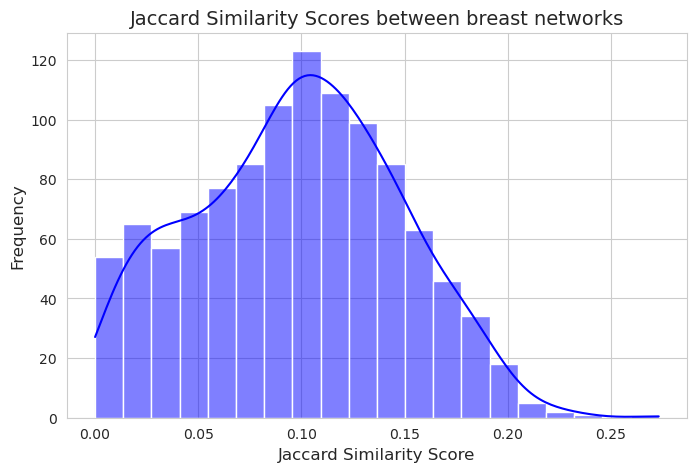

In [38]:
#plot the distribution
# Set Seaborn style for better visuals
sns.set_style("whitegrid")

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(comparison_df['jaccard_similarity'], bins=20, kde=True, color="blue")

# Labels and title
plt.xlabel("Jaccard Similarity Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title(f"Jaccard Similarity Scores between {tissue} networks", fontsize=14)

# Show plot
plt.show()

In [17]:
for patient in tcga_breast_net.index:
    for column in tcga_breast_net.columns:
        # Check if the column exists in df2
        if column in tcga_bresa_net.columns:
            # Access the value for the patient and column in df2
            value_breast = tcga_breast_net.loc[patient, column]
            value_lung = tcga_lung_net.loc[patient, column]
            print(f"Patient: {patient}, Column: {column}, Value in breast_df: {value_breast}, Value in lung_df: {value_lung} ")


KeyError: 'TCGA-AR-A1AQ-01'